In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import accuracy_score, mean_squared_error

In [20]:
X_class, y_class = make_classification(
    n_samples=200,
    n_features=5,
    n_informative=3,
    n_classes=3,
    n_clusters_per_class=1,
    random_state=42
)

# Create a synthetic dataset for regression
X_reg, y_reg = make_regression(n_samples=200, n_features=5, noise=0.2, random_state=42)

In [21]:
# Standardize the features
scaler = StandardScaler()

X_class_scaled = scaler.fit_transform(X_class)
X_reg_scaled = scaler.fit_transform(X_reg)


In [22]:
# Select a sample point
sample_point = X_class_scaled[0]

# Euclidean distance
euclidean_distances = np.linalg.norm(X_class_scaled - sample_point, axis=1)

# Manhattan distance
manhattan_distances = np.sum(np.abs(X_class_scaled - sample_point), axis=1)

# Minkowski distance with p=3
minkowski_distances = np.sum(np.abs(X_class_scaled - sample_point)**3, axis=1)**(1/3)


In [23]:
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class_scaled, y_class, test_size=0.2, random_state=42)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg_scaled, y_reg, test_size=0.2, random_state=42)


In [24]:
k = 3

# Classification with KNN
knn_classifier = KNeighborsClassifier(n_neighbors=k)
knn_classifier.fit(X_train_class, y_train_class)

KNeighborsClassifier(n_neighbors=3)

In [25]:
train_accuracy_class = knn_classifier.score(X_train_class, y_train_class)
test_accuracy_class = knn_classifier.score(X_test_class, y_test_class)

In [26]:
print("Train Accuracy (Classification):", train_accuracy_class)
print("Test Accuracy (Classification):", test_accuracy_class)

Train Accuracy (Classification): 0.9375
Test Accuracy (Classification): 0.775


In [27]:
knn_regressor = KNeighborsRegressor(n_neighbors=k)
knn_regressor.fit(X_train_reg, y_train_reg)

KNeighborsRegressor(n_neighbors=3)

In [28]:
train_error_reg = mean_squared_error(y_train_reg, knn_regressor.predict(X_train_reg))
test_error_reg = mean_squared_error(y_test_reg, knn_regressor.predict(X_test_reg))

In [29]:
print("Train MSE (Regression):", train_error_reg)
print("Test MSE (Regression):", test_error_reg)

Train MSE (Regression): 828.1289491843479
Test MSE (Regression): 1259.6912512828924


In [30]:
k_values = list(range(1, 21))
accuracy_results = []
mse_results = []

In [31]:
for k in k_values:
    # For Classification
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train_class, y_train_class)
    test_accuracy = knn_classifier.score(X_test_class, y_test_class)
    accuracy_results.append(test_accuracy)

    # For Regression
    knn_regressor = KNeighborsRegressor(n_neighbors=k)
    knn_regressor.fit(X_train_reg, y_train_reg)
    test_mse = mean_squared_error(y_test_reg, knn_regressor.predict(X_test_reg))
    mse_results.append(test_mse)

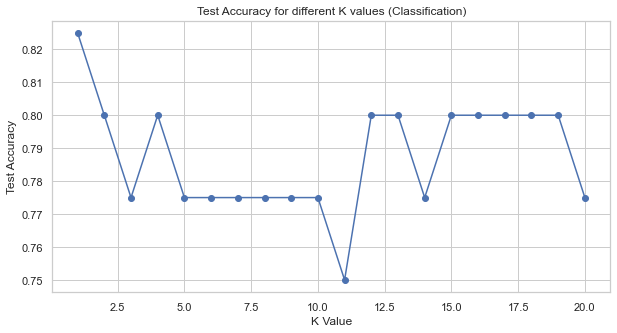

In [32]:
plt.figure(figsize=(10, 5))
plt.plot(k_values, accuracy_results, marker='o', label='Test Accuracy')
plt.title("Test Accuracy for different K values (Classification)")
plt.xlabel("K Value")
plt.ylabel("Test Accuracy")
plt.grid(True)
plt.show()

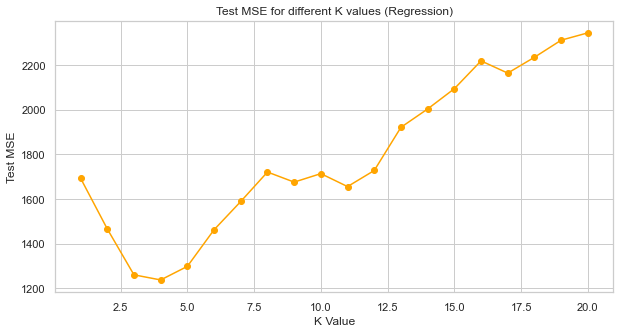

In [33]:
plt.figure(figsize=(10, 5))
plt.plot(k_values, mse_results, marker='o', color='orange', label='Test MSE')
plt.title("Test MSE for different K values (Regression)")
plt.xlabel("K Value")
plt.ylabel("Test MSE")
plt.grid(True)
plt.show()

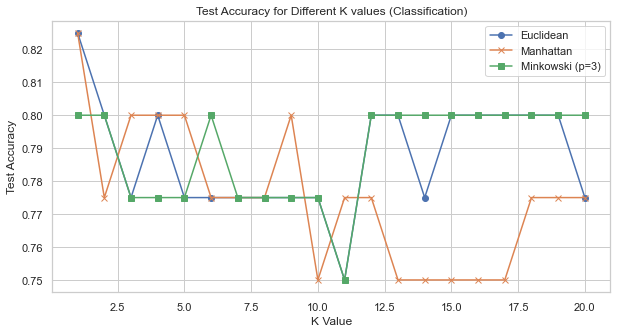

In [34]:
# Define range of k values to test
k_values = list(range(1, 21))

# Store results for different distance metrics
accuracy_results_euclidean = []
accuracy_results_manhattan = []
accuracy_results_minkowski = []

# Test accuracy for each k value with different distance metrics
for k in k_values:
    # Euclidean Distance (default)
    knn_classifier = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn_classifier.fit(X_train_class, y_train_class)
    test_accuracy_euclidean = knn_classifier.score(X_test_class, y_test_class)
    accuracy_results_euclidean.append(test_accuracy_euclidean)

    # Manhattan Distance
    knn_classifier = KNeighborsClassifier(n_neighbors=k, metric='manhattan')
    knn_classifier.fit(X_train_class, y_train_class)
    test_accuracy_manhattan = knn_classifier.score(X_test_class, y_test_class)
    accuracy_results_manhattan.append(test_accuracy_manhattan)

    # Minkowski Distance (p=3)
    knn_classifier = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=3)
    knn_classifier.fit(X_train_class, y_train_class)
    test_accuracy_minkowski = knn_classifier.score(X_test_class, y_test_class)
    accuracy_results_minkowski.append(test_accuracy_minkowski)

# Plot the test accuracy for different k values and distance metrics
plt.figure(figsize=(10, 5))
plt.plot(k_values, accuracy_results_euclidean, marker='o', label='Euclidean')
plt.plot(k_values, accuracy_results_manhattan, marker='x', label='Manhattan')
plt.plot(k_values, accuracy_results_minkowski, marker='s', label='Minkowski (p=3)')
plt.title("Test Accuracy for Different K values (Classification)")
plt.xlabel("K Value")
plt.ylabel("Test Accuracy")
plt.grid(True)
plt.legend()
plt.show()


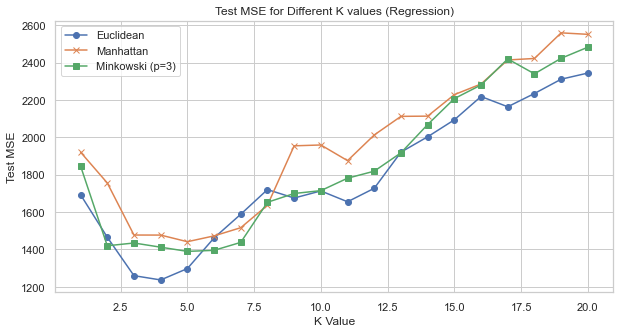

In [35]:
# Define range of k values to test
k_values = list(range(1, 21))

# Store results for different distance metrics
mse_results_euclidean = []
mse_results_manhattan = []
mse_results_minkowski = []

# Test MSE for each k value with different distance metrics
for k in k_values:
    # Euclidean Distance (default)
    knn_regressor = KNeighborsRegressor(n_neighbors=k, metric='euclidean')
    knn_regressor.fit(X_train_reg, y_train_reg)
    test_mse_euclidean = mean_squared_error(y_test_reg, knn_regressor.predict(X_test_reg))
    mse_results_euclidean.append(test_mse_euclidean)

    # Manhattan Distance
    knn_regressor = KNeighborsRegressor(n_neighbors=k, metric='manhattan')
    knn_regressor.fit(X_train_reg, y_train_reg)
    test_mse_manhattan = mean_squared_error(y_test_reg, knn_regressor.predict(X_test_reg))
    mse_results_manhattan.append(test_mse_manhattan)

    # Minkowski Distance (p=3)
    knn_regressor = KNeighborsRegressor(n_neighbors=k, metric='minkowski', p=3)
    knn_regressor.fit(X_train_reg, y_train_reg)
    test_mse_minkowski = mean_squared_error(y_test_reg, knn_regressor.predict(X_test_reg))
    mse_results_minkowski.append(test_mse_minkowski)

# Plot the test MSE for different k values and distance metrics
plt.figure(figsize=(10, 5))
plt.plot(k_values, mse_results_euclidean, marker='o', label='Euclidean')
plt.plot(k_values, mse_results_manhattan, marker='x', label='Manhattan')
plt.plot(k_values, mse_results_minkowski, marker='s', label='Minkowski (p=3)')
plt.title("Test MSE for Different K values (Regression)")
plt.xlabel("K Value")
plt.ylabel("Test MSE")
plt.grid(True)
plt.legend()
plt.show()
